# About tidal deformabilities

Here we explore a bit deeper into the tidal deformabilities

There are two possible parametrizations of tidal deformabilities: $\Lambda_{1, 2}$ (the individual tidal deformabilities) and $\tilde{\Lambda}, \delta\tilde{\Lambda}$. The latter is defined in [this paper](https://arxiv.org/pdf/1402.5156.pdf).

In [42]:
import numpy as np 
import bilby 
import matplotlib.pyplot as plt
import corner
params = {"axes.grid": True,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(params)

default_corner_kwargs = dict(bins=40, 
                        smooth=1., 
                        show_titles=False,
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        color="blue",
                        # quantiles=[],
                        # levels=[0.9],
                        plot_density=True, 
                        plot_datapoints=False, 
                        fill_contours=True,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        save=False)

## Lambdas to lambda tildes

In [43]:
N = 10000 # number of samples

m1_prior = bilby.core.prior.Uniform(minimum = 1, maximum = 3)
m2_prior = bilby.core.prior.Uniform(minimum = 1, maximum = 3)

lambda1_prior = bilby.core.prior.Uniform(minimum = 0, maximum = 5000)
lambda2_prior = bilby.core.prior.Uniform(minimum = 0, maximum = 5000)

# Draw samples from the priors
m1_samples = m1_prior.sample(size = N)
m2_samples = m2_prior.sample(size = N)
lambda1_samples = lambda1_prior.sample(size = N)
lambda2_samples = lambda2_prior.sample(size = N)

# Convert 
lambda_tilde = bilby.gw.conversion.lambda_1_lambda_2_to_lambda_tilde(lambda1_samples, lambda2_samples, m1_samples, m2_samples)
delta_lambda_tilde = bilby.gw.conversion.lambda_1_lambda_2_to_delta_lambda_tilde(lambda1_samples, lambda2_samples, m1_samples, m2_samples)

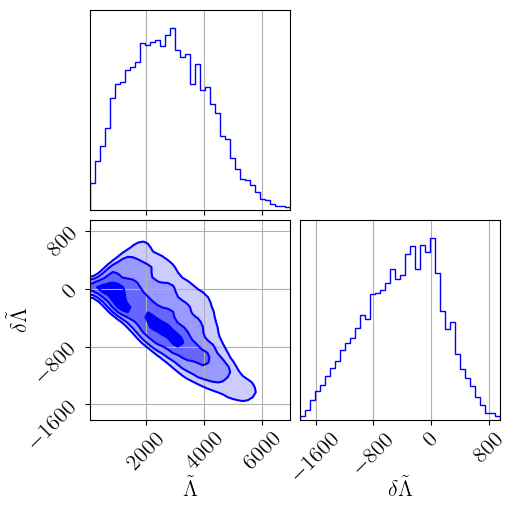

In [44]:
samples = np.vstack((lambda_tilde, delta_lambda_tilde)).T
labels = [r"$\tilde{\Lambda}$", r"$\delta\tilde{\Lambda}$"]
fig = corner.corner(samples, labels = labels, **default_corner_kwargs)
plt.show()
plt.close()

## Lambda tildes to lambdas

In [45]:
lambda_tilde_prior = bilby.core.prior.Uniform(minimum = 0, maximum = 5000)
delta_lambda_tilde_prior = bilby.core.prior.Uniform(minimum = -1000, maximum = 1000)

lambda_tilde_samples = lambda_tilde_prior.sample(size = N)
delta_lambda_tilde_samples = delta_lambda_tilde_prior.sample(size = N)

# Convert to lambdas
lambda1, lambda2 = bilby.gw.conversion.lambda_tilde_delta_lambda_tilde_to_lambda_1_lambda_2(lambda_tilde_samples, delta_lambda_tilde_samples, m1_samples, m2_samples)

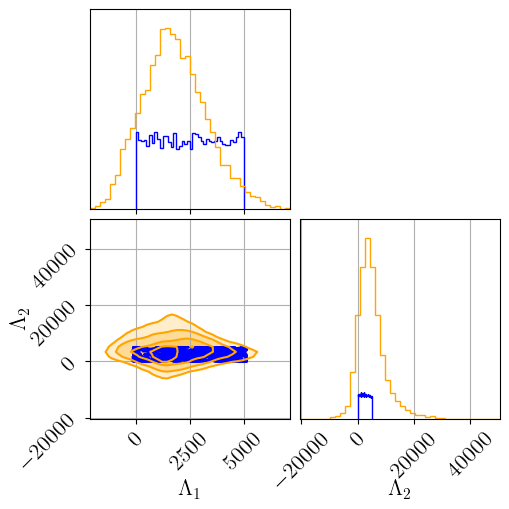

In [46]:
original_samples = np.vstack((lambda1_samples, lambda2_samples)).T
samples = np.vstack((lambda1, lambda2)).T
labels = [r"$\Lambda_1$", r"$\Lambda_2$"]
fig = corner.corner(original_samples, labels = labels, **default_corner_kwargs)
default_corner_kwargs["color"] = "orange"
corner.corner(samples, labels = labels, fig = fig, **default_corner_kwargs)
plt.show()
plt.close()
# plt.scatter(lambda1_samples, lambda2_samples, label = "Uniform", zorder=100)
# plt.scatter(lambda1, lambda2, label = "Transformed", zorder=100)
# plt.xlabel(r"$\Lambda_1$")
# plt.ylabel(r"$\Lambda_2$")
# plt.show()